# Course Enrollment

## Authors: Isaac, Conor, and Quoc

    The purpose of this notebook is to teach you, the reader, how to use the code that we have spent the past year creating. The purpose of that code is to predict course enrollment for given quarters. What that means is that you can give our code a large amount of data, which we will teach you how to format and where to put it, and the code will learn the patterns of that code and predict the number of students that will take every class for the quarters that you wish to predict.

In [11]:
# This code block contains all necessary libraries needed to run the code
# Consult the README file to learn how to install the libraries on your machine
import pandas as pd
import random
import wandb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt


# These are not libraries but our code, made to be run from only a few lines for clarity's sake
from curation import Curate
from create_datasets import CreateData
from kfold_test import kfold

In [2]:
# This is the data that we use to train our model
# Make sure your data is in this format, we got this from the Registrar's office
base_data = pd.read_csv('data/WWU_course_info.csv', encoding='ISO-8859-1')
base_data.head()

,TERM,CRN,SUBJECT,COURSE_NUMBER,TITLE,ACTUAL_ENROLL,CAPENROLL,PRIMARY_BEGIN_TIME,PRIMARY_END_TIME,U,M,T,W,R,F,S,PRIMARY_INSTRUCTOR_TENURE_CODE,CAMPUS
0,201510,10046,COMM,442,Video Workshop,12,16,1700.0,1820.0,NaN,NaN,T,NaN,R,NaN,NaN,NT,M
1,201510,10049,ENG,101,Writing and Critical Inquiry,24,24,830.0,950.0,NaN,M,NaN,NaN,NaN,F,NaN,NaN,M
2,201510,10052,ENG,101,Writing and Critical Inquiry,24,24,830.0,950.0,NaN,M,NaN,W,NaN,NaN,NaN,NaN,M
3,201510,10055,ECON,206,Intro to Microeconomics,60,60,1130.0,1250.0,NaN,M,NaN,W,NaN,F,NaN,NT,M
4,201510,10060,ENG,101,Writing and Critical Inquiry,24,24,1000.0,1120.0,NaN,M,NaN,NaN,NaN,F,NaN,NaN,M


In [4]:
# This class creates two seperate files, machine_learning_data.csv and visualization.csv
# Both are used for what the names imply, we will use the first to train our models and the 
# second to create graphs and understand the data
Curate.main()

In [8]:
# This class takes the machine learning data created in the previous class and splits it up into smaller chunks
# That way when training takes place it can randomize the quarters and train on them and test on them randomly which does better than in order
CreateData.main()

Current Test # 1.0
Total train files: 36
Merged Train Set Size: (1317, 87)
Merged Validation Set Size: (174, 87)
Train Set After Deduplication: (1317, 87)
Validation Set After Deduplication: (174, 87)
(174, 86) val shape
(1317, 86) train shape
Validation RMSE: 7.21
R² Score: 0.46

Current Test # 2.0
Total train files: 36
Merged Train Set Size: (1390, 87)
Merged Validation Set Size: (101, 87)
Train Set After Deduplication: (1390, 87)
Validation Set After Deduplication: (101, 87)
(101, 86) val shape
(1390, 86) train shape
Validation RMSE: 6.08
R² Score: 0.45

Current Test # 3.0
Total train files: 36
Merged Train Set Size: (1365, 87)
Merged Validation Set Size: (126, 87)
Train Set After Deduplication: (1365, 87)
Validation Set After Deduplication: (126, 87)
(126, 86) val shape
(1365, 86) train shape
Validation RMSE: 5.18
R² Score: 0.45

Current Test # 4.0
Total train files: 36
Merged Train Set Size: (1338, 87)
Merged Validation Set Size: (153, 87)
Train Set After Deduplication: (1338, 87)

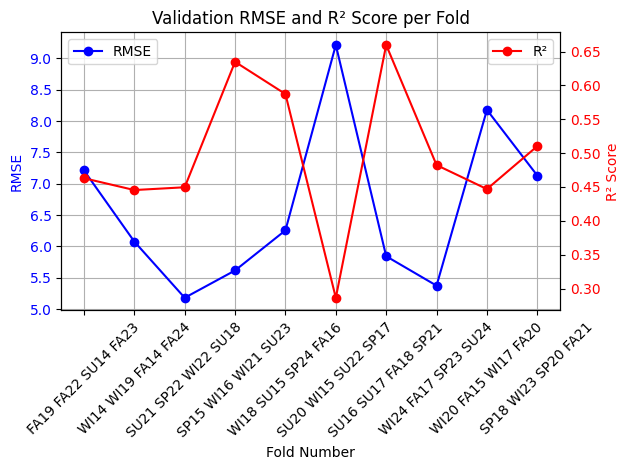

fold,▁▂▃▃▄▅▆▆▇█
r2,▄▄▄█▇▁█▅▄▅
rmse,▅▃▁▂▃█▂▁▆▄
fold,10
r2,0.51031
rmse,7.13078


In [12]:
# Using various searching algorithms, we have found that the below model is one of our best models
model = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='tanh',
    solver='adam',
    learning_rate='adaptive',
    max_iter=500,
    alpha=0.0001,
    verbose=False
)


kfold.main(model)
